# Set up

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.weightstats import DescrStatsW
from scipy.interpolate import CubicSpline

%matplotlib inline

In [4]:
sns.set_style("ticks",
             rc = {'axes.grid' : False,
                  'grid.linestyle' : 'dashed'})

sns.set_context('poster')
sns.set_palette("Set2")

# Reading and preparing data

In [5]:
df_full = pd.read_pickle('./output/base_plikHM_TTTEEE_lowTEB_lp.pkl')
df_full = df_full.reindex(np.arange(len(df_full)))

In [6]:
df_full.to_csv('./output/base_plikHM_TTTEEE_lowTEB_lp.txt', 
              sep='\t')

In [7]:
df_param_names = pd.read_pickle('./input/param_names.pkl')

In [8]:
params = ['cf_peak', 'cf_dip', 'lp','omegabh2', 'omegach2', 'H0*', 'tau', 'A*', 'ns', 'rdrag*']
df = df_full[params].copy()
df.loc[:,'lp'] = df_full.loc[:,'lp']/(df_full.loc[:,'H0*']/100)
df.loc[:,'cf_peak'] = df_full.loc[:,'cf_peak']/(df_full.loc[:,'H0*']/100)
df.loc[:,'cf_dip'] = df_full.loc[:,'cf_dip']/(df_full.loc[:,'H0*']/100)

In [9]:
params_lp = ['cf_peak', 'cf_dip', 'lp','rdrag*']
params_clean = ['lp','omegabh2', 'omegach2', 'H0*', 'tau', 'A*', 'ns']

# Functions and parameters for plotting

In [10]:
cmap_contour = sns.cubehelix_palette(light=0.6, dark=0.15,rot=-0.3, hue=1, as_cmap=True)

In [11]:
cmap = sns.cubehelix_palette(light=1, dark=0, as_cmap=True,rot=-0.3, hue=1)
hist_color = sns.cubehelix_palette(light=1, dark=0,rot=-0.3, hue=1)[-3]

In [12]:
def plot_hist2d(*args, color = None, **kwargs):
    return plt.hist2d(*args, **kwargs)[3]

In [58]:
def plot_hist(ax, arr, weights, color=hist_color, bins=50):
    stats = DescrStatsW(arr,weights=weights)
    mean = np.round(stats.mean,2)
    std = np.round(stats.std,2)
    precc = np.round(100*std/mean,2)
    ax.hist(arr, bins = bins, weights=weights, color=color,
        histtype='stepfilled', normed = True)
    ax.set_ylabel('Frequency')
#     ax.set_title('$r$ = {} $\pm$ {}\n $\sigma/\mu$ = {}% '.format(mean,std,precc),
#          fontsize=15)
    ax.text(.98,.98,'$r$ = {} $\pm$ {}\n$\sigma/\mu$ = {}% '.format(mean,std,precc), 
            fontsize=15, 
            horizontalalignment='right', 
            verticalalignment='top',
            transform=ax.transAxes)

In [14]:
def plot_matrix(df, params, size = 3 , hspace=0.05, wspace=0.05):
    ax = sns.PairGrid(df[params], size=size, aspect=1)
    ax.map_offdiag(plot_hist2d, bins = 40, weights=df_full['weight'],
                  cmap=cmap)
    ax.map_diag(plt.hist, histtype='stepfilled', bins=40,
                color=hist_color,weights=df_full['weight'])    
    plt.subplots_adjust(hspace=hspace, wspace=wspace)
    return ax

In [15]:
# from scipy.interpolate import CubicSpline
# # function to get ML and 1 sigma intervals
# arr = df['lp'].values
# weights = df_full['weight'].values
# nbins = 40
# hist, edge = np.histogram(arr, bins = nbins, weights=weights, density=True)
# edge_central = edge[1:] - (edge[1] - edge[0])/2
# pdf = CubicSpline(edge_central,hist)

# Plotting 

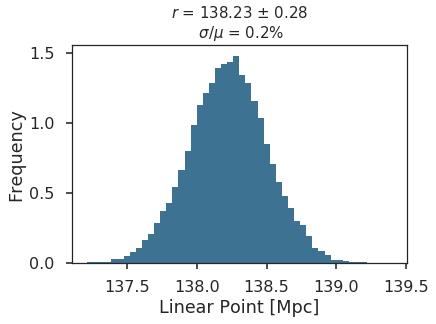

In [46]:
fig, ax = plt.subplots()

arr = df['lp'].values
weights = df_full['weight'].values

plot_hist(ax,arr,weights)


ax.set_xlabel('Linear Point [Mpc]')

# plt.savefig('./Figures/lp_dist.pdf', bbox_inches='tight',
#             transparent=True)

plt.show()

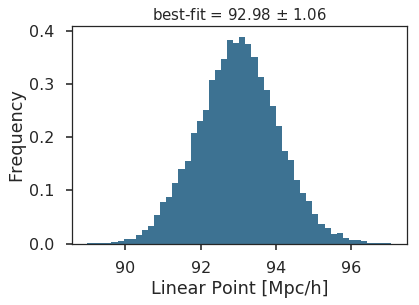

In [17]:
fig, ax = plt.subplots()

arr = df_full['lp'].values
weights = df_full['weight'].values

plot_hist(ax,arr,weights)


ax.set_xlabel('Linear Point [Mpc/h]')

# plt.savefig('./Figures/lp_h_dist.pdf', bbox_inches='tight',
#             transparent=True)

plt.show()

In [172]:
df_param_names.loc['H0*']

latex    H_0 
Name: H0*, dtype: object

In [18]:
labels_lp = [r'$r_{\rm peak}$ [Mpc]',
          r'$r_{\rm dip}$ [Mpc]',
          r'$r_{\rm lp}$ [Mpc]',
          r'$r_{\rm drag}$ [Mpc]']

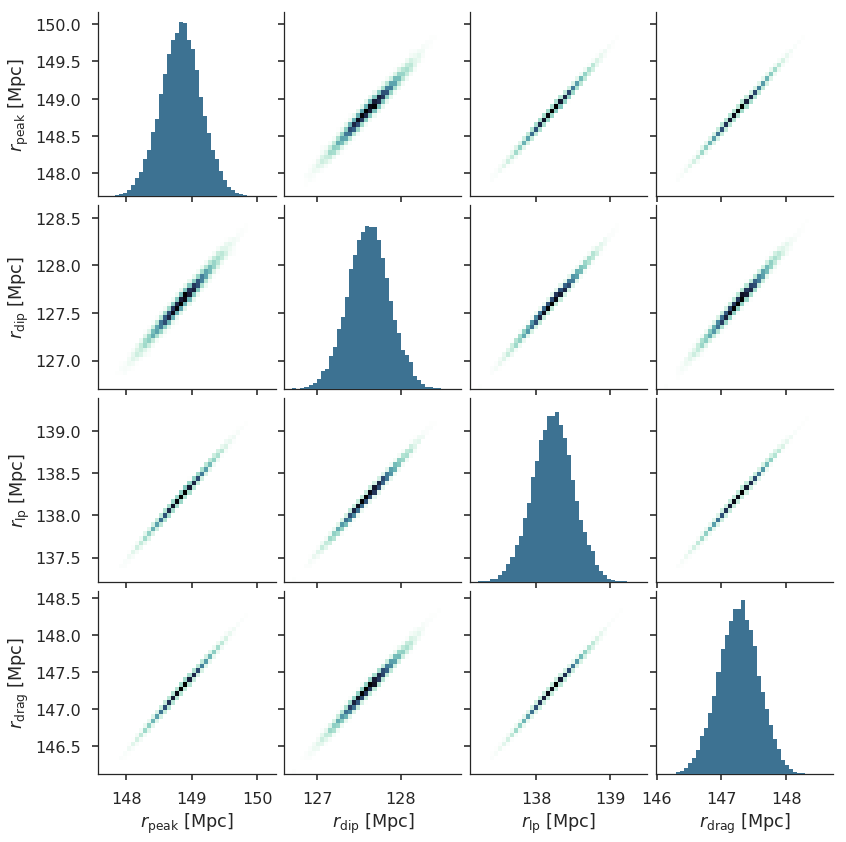

In [21]:
g = plot_matrix(df,params_lp)
xlabels,ylabels = [],[]

for i in range(len(labels_lp)):
    g.axes[i,0].yaxis.set_label_text(labels_lp[i])
    g.axes[-1,i].xaxis.set_label_text(labels_lp[i])
# plt.savefig('./Figures/lp_cf_rdrag_matrix.pdf', bbox_inches='tight',
#             transparent=True)
plt.show()

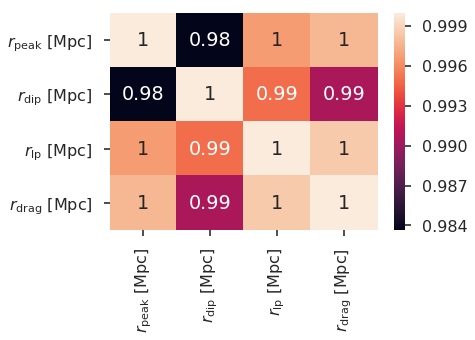

In [23]:
sns.heatmap(df[params_lp].corr(),annot=True, robust=True,
            xticklabels=labels_lp, yticklabels=labels_lp)
plt.yticks(rotation='horizontal')
# plt.savefig('./Figures/lp_cf_rdrag_corr.pdf', bbox_inches='tight',
#             transparent=True)
plt.show()

In [24]:
labels_clean = [ r'$r_{\rm lp}$ [Mpc]',
         r'$\Omega_b h^2$',
         r'$\Omega_c h^2$',
         r'$H_0$',
         r'$\tau$',
         r'$A$',
         r'$n_s$']

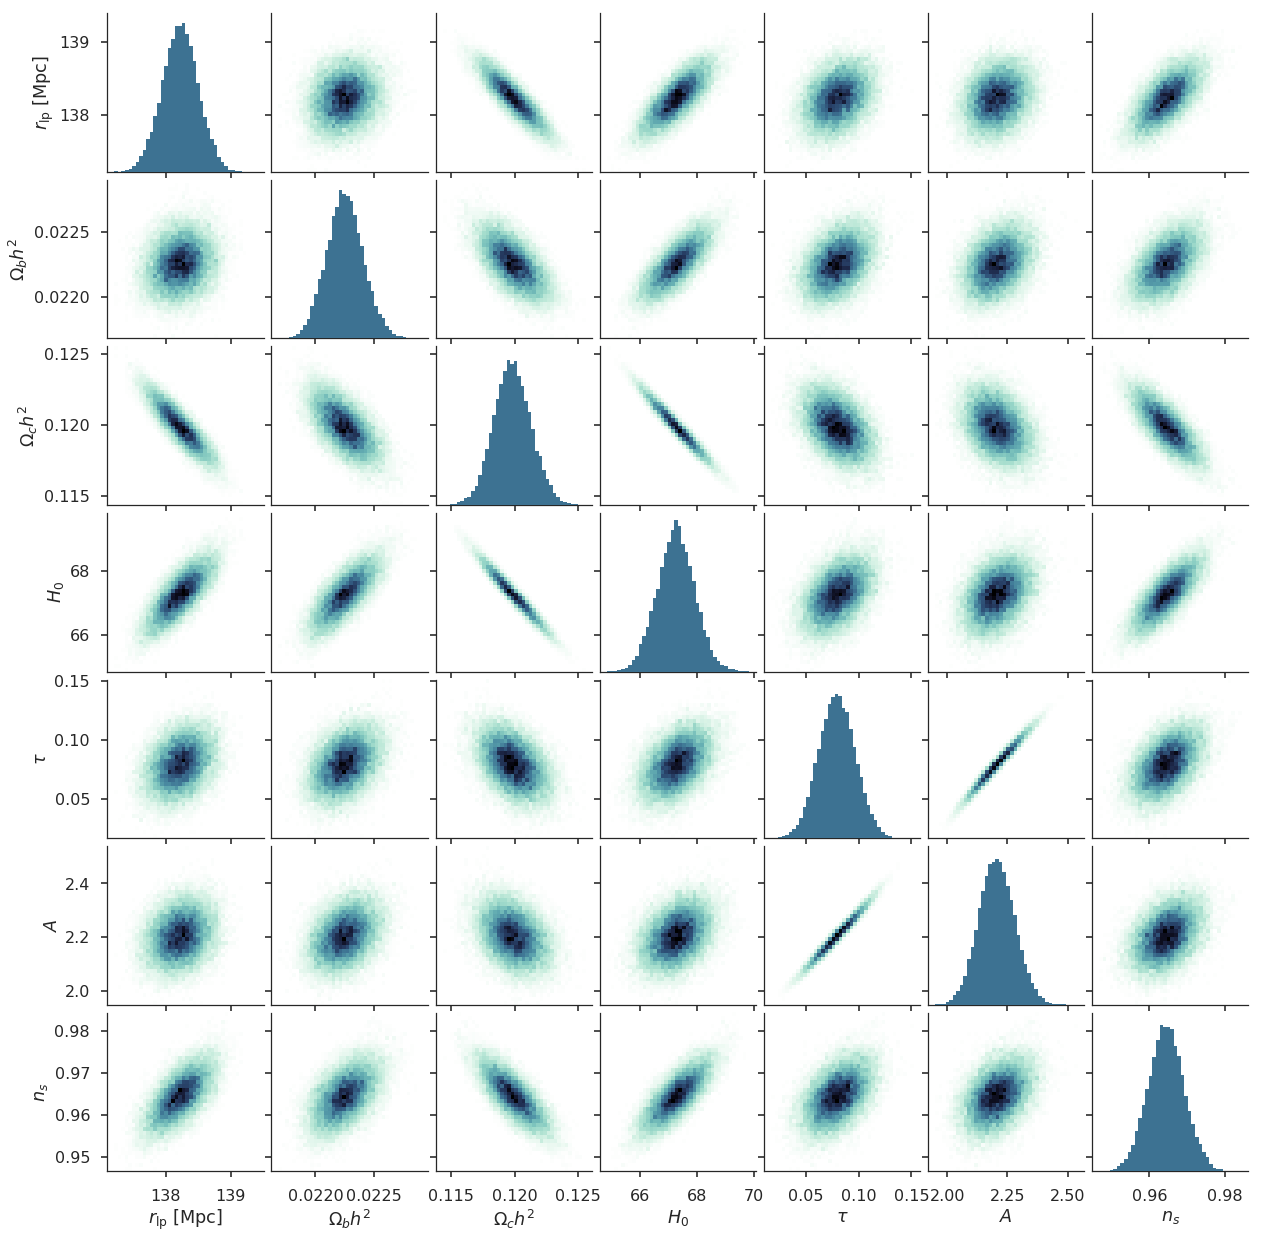

In [25]:
g = plot_matrix(df,params_clean, size = 2.5)

for i in range(len(labels_clean)):
    g.axes[i,0].yaxis.set_label_text(labels_clean[i])
    g.axes[-1,i].xaxis.set_label_text(labels_clean[i])
    
# plt.savefig('./Figures/lp_cosmo_matrix.pdf', bbox_inches='tight',
#             transparent=True)
plt.show()

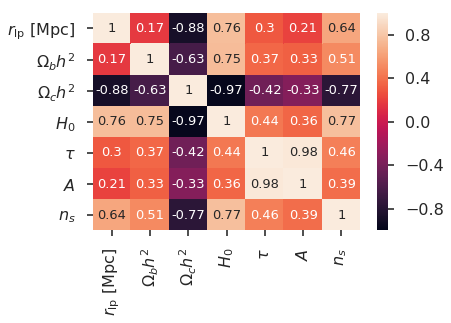

In [27]:
sns.heatmap(df[params_clean].corr(), vmin=-1, vmax = 1,
            annot=True, robust=True, annot_kws=dict(fontsize=13),
           xticklabels=labels_clean, yticklabels=labels_clean)#, cmap=cmap)
plt.yticks(rotation='horizontal')

# plt.savefig('./Figures/lp_cosmo_corr.pdf', bbox_inches='tight',
#             transparent=True)
plt.show()

# Plotting with confidence curves

In [28]:
def plot_confidence_levels_2d(x,y, targets, bins=50, weights=None,
                             fill = False, **kwargs):
    """
    Returns plt.contourf with contour selected by target levels. 
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    targets: list of floats normalized to one in decreasing order
        Target confidence levels
    bins: int
        Number of bins to perform histogram2d 
    weights: array, shape of x, y
        In case x and y are weighted
    fill: boolean
        Whether or not to fill curves.
    """
    # calculating 2d histogram
    Z, xedges, yedges = np.histogram2d(x,y, bins, weights=weights)
    dx = (xedges[1] - xedges[0])
    dy = (yedges[1] - yedges[0])
    xplot = xedges[:-1] + dx/2
    yplot = yedges[:-1] + dy/2
    # calculating areas for each height
    heights = np.linspace(0,Z.max()*0.9,500)
    areas = [Z[Z > i].sum() for i in heights]
    areas /= Z.sum()
    # getting levels for each target
    clevels = []
    for t in targets:
        clevels.append(CubicSpline(heights,areas - t).roots(extrapolate=False)[0])
    clevels = np.array(clevels)
    # for better transition in plot
    Z = np.log(Z+1)
    clevels = np.log(clevels+1)
    if fill == True:
        return plt.contourf(xplot, yplot,Z, levels=np.append(clevels,Z.max()), 
                            **kwargs)
    else:
        return plt.contour(xplot, yplot,Z, levels=np.append(clevels,Z.max()), 
                            **kwargs)

In [29]:
def plot_matrix_ccurves(df, params, size = 3 , hspace=0.05, wspace=0.05,
                       targets=[0.9545, 0.6827], bins = 50):
    ax = sns.PairGrid(df[params], size=size, aspect=1)
    ax.map_offdiag(plot_confidence_levels_2d, targets = targets, bins = bins,
                   weights=df_full['weight'], fill=True, cmap=cmap_contour)
    ax.map_diag(plt.hist, histtype='stepfilled', bins=bins,
                color=hist_color,weights=df_full['weight'])    
    plt.subplots_adjust(hspace=hspace, wspace=wspace)
    return ax

# applying to pairgrid

In [16]:
cmap_contour = sns.cubehelix_palette(light=0.8, dark=0.3,rot=-0.3, hue=1, as_cmap=True)

/home/modwyer/anaconda3/envs/up/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


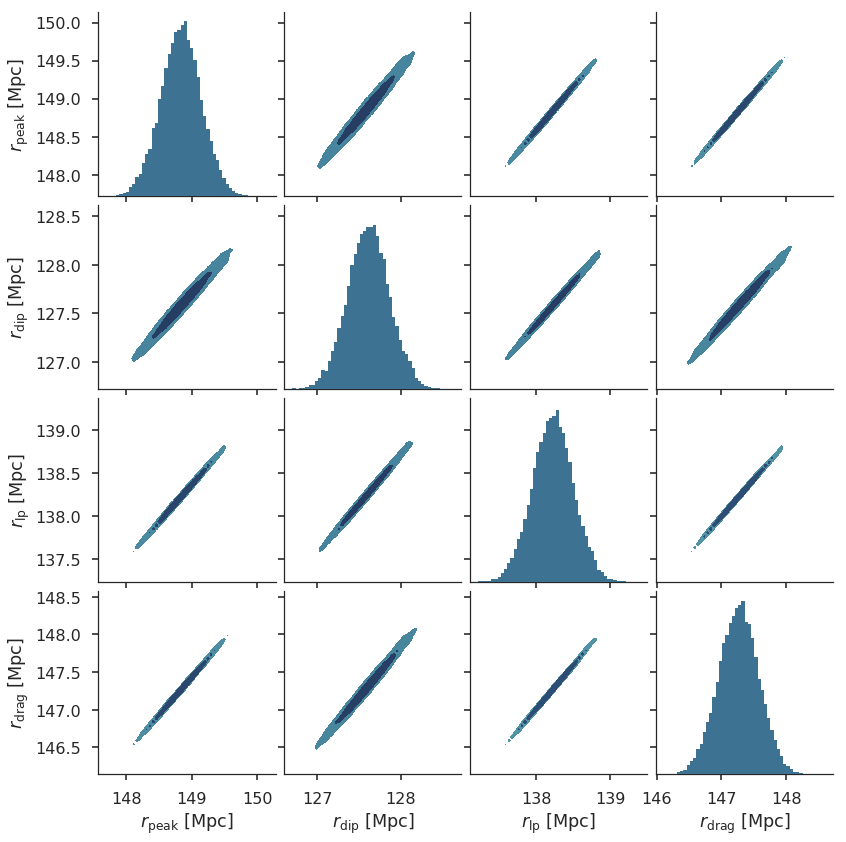

In [30]:
g = plot_matrix_ccurves(df,params_lp)
xlabels,ylabels = [],[]

for i in range(len(labels_lp)):
    g.axes[i,0].yaxis.set_label_text(labels_lp[i])
    g.axes[-1,i].xaxis.set_label_text(labels_lp[i])
# plt.savefig('./Figures/lp_cf_rdrag_matrix_confidence_curves.pdf', bbox_inches='tight',
#             transparent=True)
plt.show()

/home/modwyer/anaconda3/envs/up/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


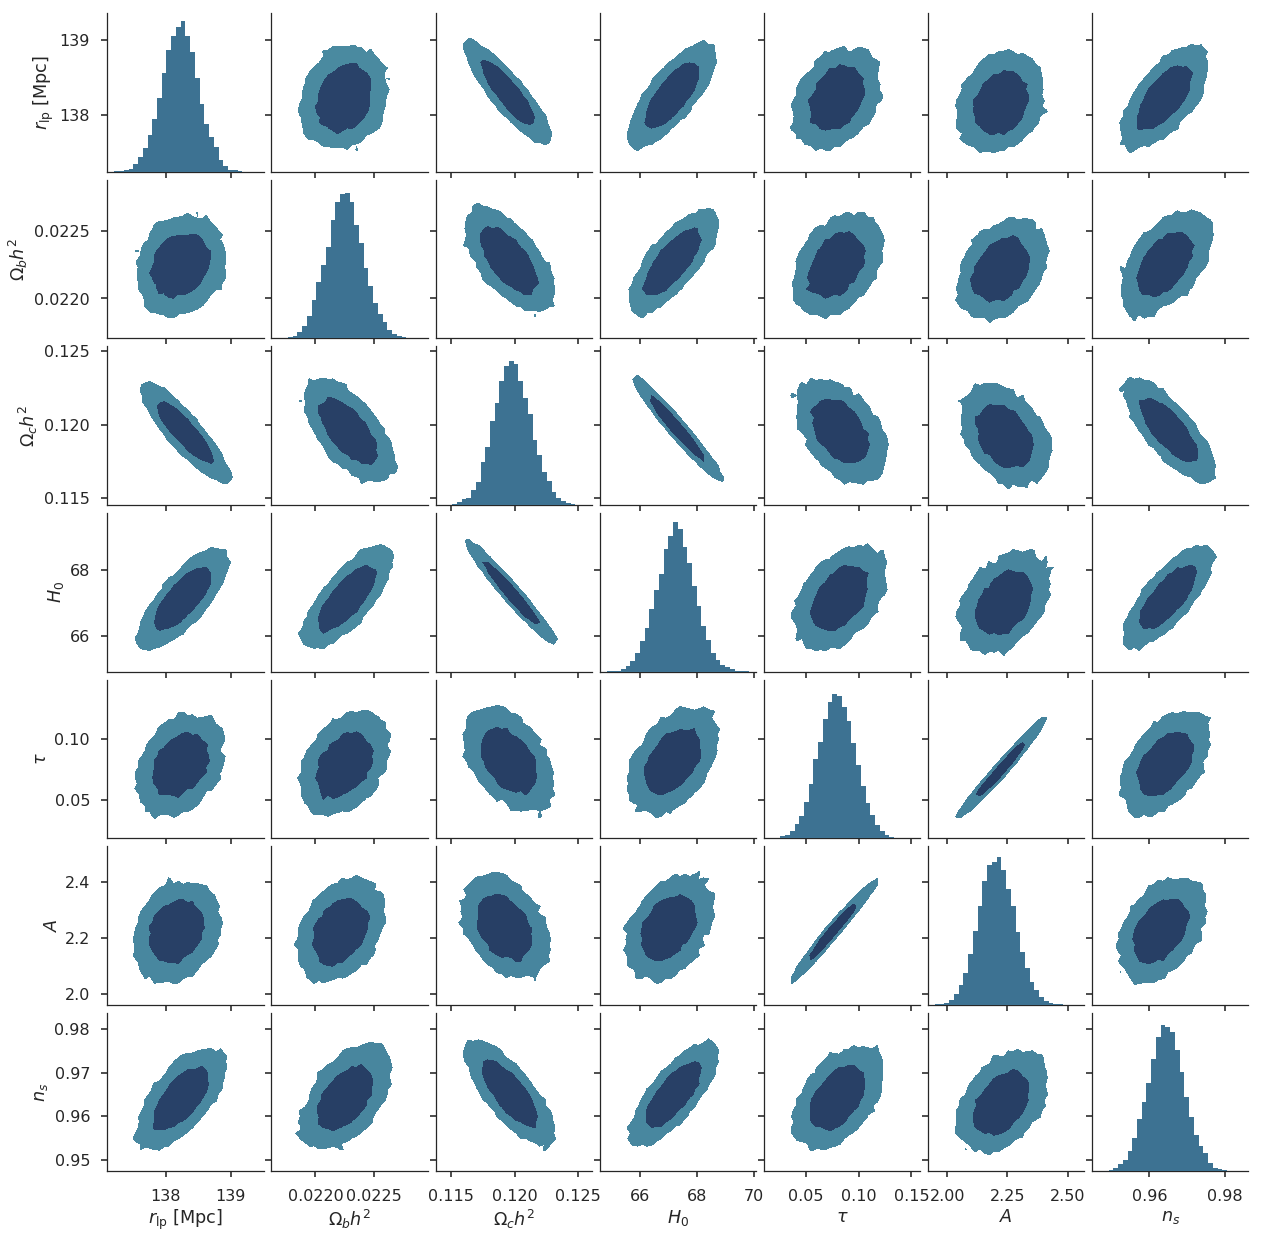

In [35]:
g = plot_matrix_ccurves(df,params_clean, size = 2.5, bins = 30)

for i in range(len(labels_clean)):
    g.axes[i,0].yaxis.set_label_text(labels_clean[i])
    g.axes[-1,i].xaxis.set_label_text(labels_clean[i])
    
# plt.savefig('./Figures/lp_cosmo_matrix_confidence_curves.pdf', bbox_inches='tight',
#             transparent=True)
plt.show()

# Auto distributions of lp, cf, rdrag

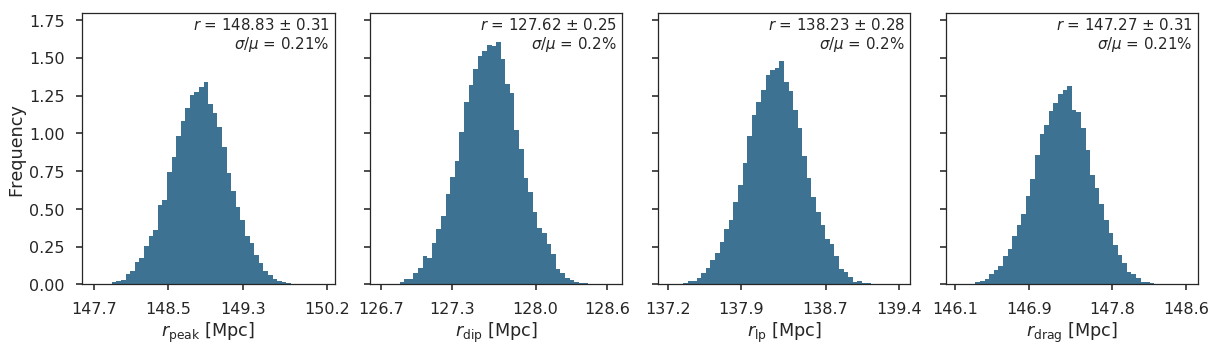

In [64]:
fig, ax = plt.subplots(1,4, figsize=(20,5), sharey=True)
weights = df_full['weight'].values


for i in range(len(params_lp)):
    arr = df[params_lp[i]].values
    plot_hist(ax[i],arr,weights, bins = 50)
    
    xticks = np.round(np.linspace(arr.min(),arr.max(),4),1)
    ax[i].set_xticks(xticks)
    ax[i].set_xlabel(labels_lp[i])
    if i > 0:
        xticks = xticks[:]
        ax[i].set_ylabel("")
    
        #ax[i].set_yticks([])

fig.subplots_adjust(wspace=0.14)
ax[0].set_ylim(0,1.8)
plt.savefig('./Figures/lp_cf_rdrag_dist.pdf', bbox_inches='tight',
            transparent=True)
plt.show()

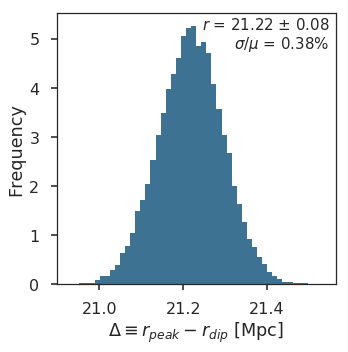

In [81]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

arr = (df['cf_peak']-df['cf_dip']).values
weights = df_full['weight'].values

plot_hist(ax,arr,weights, bins = 50)


ax.set_xlabel(r'$\Delta \equiv r_{peak}-r_{dip}$ [Mpc]')

plt.savefig('./Figures/delta_peak_dip_dist.pdf', bbox_inches='tight',
            transparent=True)

plt.show()